# Problema de Regresión

De la misma forma que se las ANN son usadas para problemas de clasificación se han utilizado también para abordar problemas de regresión, su funcionamiento es el mismo, la única diferencia radica en que su salida es continua.  



In [1]:
#--- Cargamos el paquete torch y otras utilidades
import torch
from torch.autograd import Variable # Para convertir nuestras varaibles a tensores
import torch.utils.data as Data

import numpy as np

x = np.linspace(-1, 1, 100)
y = x**2 + 0.2*np.random.rand(100) # Calculamos una cuadrática con ruido

np.shape(x), np.shape(y)

((100,), (100,))

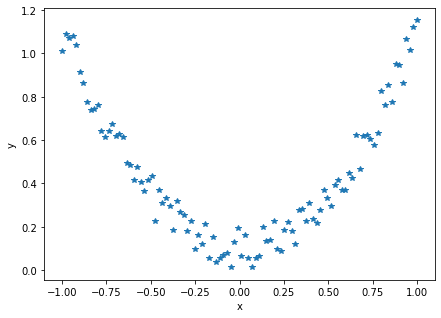

In [2]:
#--- Visualizamos los datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
plt.plot(x,y,'*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
#--- Convertimos los numpy a tensores

X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

In [4]:
#--- Definimos la ANN
input_dim = 1
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, input_dim),
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [5]:
#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

Epoch: [1/1], loss: 0.1448662430047989


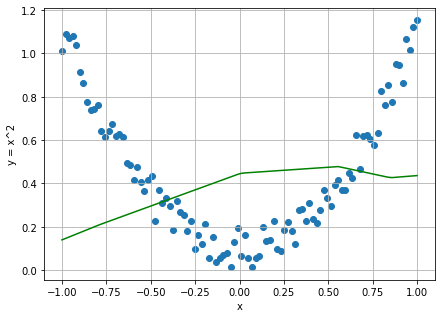

Epoch: [1/51], loss: 0.038876473903656006


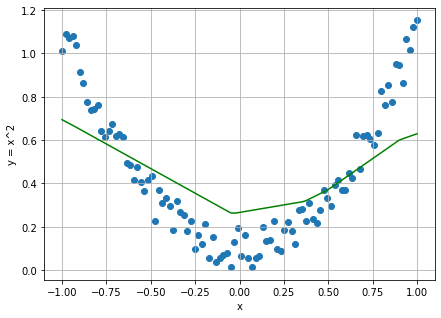

Epoch: [1/101], loss: 0.008872289210557938


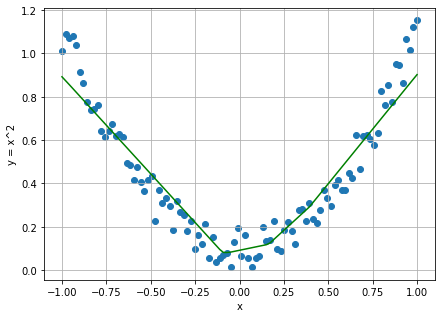

Epoch: [1/151], loss: 0.006434540264308453


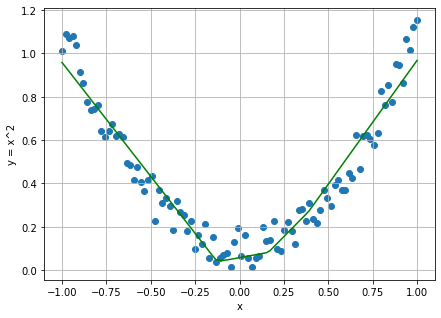

Epoch: [1/201], loss: 0.005857180338352919


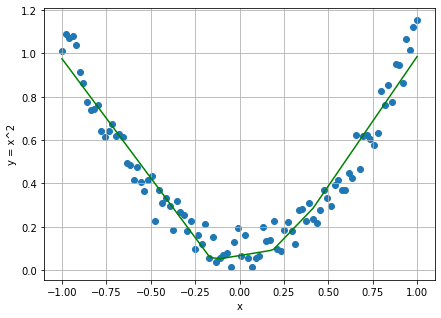

In [6]:
#-- Definimos el número de épocas
n_epoch = 200
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y = x^2')
      plt.show()

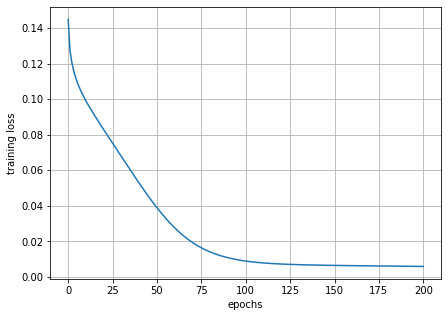

In [7]:
#-- Graficamos la perdida
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()